In [1]:
import pandas as pd 
import numpy as np

In [2]:
#Load DataA.csv 

dataB = pd.read_csv(r'C:\Users\tonkh\OneDrive\Desktop\ECE 657A\Assignment\ece_657a_assignments-master\ece_657a_assignments-master\Assignment_1\Datasets\DataB.csv')

In [3]:
dataB.head()

,Unnamed: 0,fea.1,fea.2,fea.3,fea.4,fea.5,fea.6,fea.7,fea.8,fea.9,...,fea.776,fea.777,fea.778,fea.779,fea.780,fea.781,fea.782,fea.783,fea.784,gnd
0,1,4,4,3,0,0,4,2,1,4,...,1,3,0,4,2,1,1,4,5,0
1,2,5,1,4,3,1,3,5,1,4,...,1,1,3,3,1,3,3,5,4,0
2,3,1,3,0,3,1,1,0,1,0,...,3,0,2,4,2,2,1,2,4,0
3,4,5,3,2,3,5,2,2,0,4,...,5,4,5,1,4,4,2,4,4,0
4,5,3,5,3,3,0,4,1,1,4,...,1,3,3,3,1,2,4,1,1,0


## Unnamed Column in the datas set removed:

In [4]:
dataB_updated = dataB.drop(['Unnamed: 0'], axis=1)
print("Updated Dataset after removal of 'Unnamed: 0' column: \n", dataB_updated.head(20))

uniqueValues = dataB['gnd'].unique()
print(uniqueValues) #Unique Values in Column

Updated Dataset after removal of 'Unnamed: 0' column: 
     fea.1  fea.2  fea.3  fea.4  fea.5  fea.6  fea.7  fea.8  fea.9  fea.10  \
0       4      4      3      0      0      4      2      1      4       1   
1       5      1      4      3      1      3      5      1      4       4   
2       1      3      0      3      1      1      0      1      0       2   
3       5      3      2      3      5      2      2      0      4       5   
4       3      5      3      3      0      4      1      1      4       3   
5       0      0      1      5      0      5      2      4      3       2   
6       1      3      3      5      3      2      4      4      2       1   
7       3      3      0      5      2      1      2      5      3       0   
8       5      0      3      3      1      3      0      0      2       3   
9       5      5      4      5      3      1      0      0      4       1   
10      1      4      2      1      4      4      3      5      0       3   
11      5      2    

In [5]:
#Checking missing values in Dataset
dataB_updated.isna().sum()

fea.1      0
fea.2      0
fea.3      0
fea.4      0
fea.5      0
          ..
fea.781    0
fea.782    0
fea.783    0
fea.784    0
gnd        0
Length: 785, dtype: int64

In [6]:
dataB_updated.isna().sum().sum()

0

### No missing values in dataset

### 1.  Executing PCA from sratch Using Python : Step by Step

##### Step 1 Standardizing the dataset

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [8]:
X,y=dataB.iloc[:,1:].values,dataB.iloc[:,0].values

In [9]:
# To split training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0
)

In [10]:
#To standardize features
stansc=StandardScaler()
X_train_std=stansc.fit_transform(X_train)
X_test_std=stansc.transform(X_test)

##### Step 2 Constructing Covariance Matrix and decomposing it into Eigen Values and Eigen Vectors

In [11]:
cov_mat=np.cov(X_train_std.T)
dataB_eigen_values,dataB_eigen_vectors=np.linalg.eig(cov_mat)

In [12]:
dataB_eigen_values # Eigen Values :

array([5.20286861e+01, 2.88048549e+01, 2.75566117e+01, 2.40591802e+01,
       2.13365943e+01, 1.63060554e+01, 1.36719064e+01, 1.22752984e+01,
       1.07561464e+01, 1.01983670e+01, 9.24369939e+00, 8.44860285e+00,
       7.64548992e+00, 7.31309904e+00, 7.03727511e+00, 6.56545504e+00,
       6.26656122e+00, 6.16414170e+00, 5.97270910e+00, 5.71558926e+00,
       5.64518093e+00, 5.43068686e+00, 5.35465881e+00, 5.07781053e+00,
       4.99438486e+00, 4.68728826e+00, 4.51323364e+00, 4.44703866e+00,
       4.38430975e+00, 4.31697605e+00, 4.27529745e+00, 4.18778992e+00,
       4.07638486e+00, 4.04388343e+00, 3.88080511e+00, 3.77432534e+00,
       3.76488964e+00, 3.55314736e+00, 3.45347354e+00, 3.36008637e+00,
       3.31488855e+00, 3.23103414e+00, 3.21415989e+00, 3.14831871e+00,
       3.07532384e+00, 3.03260732e+00, 2.98027637e+00, 2.96233066e+00,
       2.90272767e+00, 2.84950274e+00, 2.83497459e+00, 2.76415346e+00,
       2.72942890e+00, 2.69719972e+00, 2.67189498e+00, 2.58427791e+00,
      

In [13]:
dataB_eigen_vectors #Eigen Vectors

array([[-0.00527766,  0.00109112, -0.00162038, ..., -0.0001822 ,
         0.00025743, -0.00047106],
       [-0.00017864, -0.00586636, -0.00288548, ...,  0.00090423,
        -0.01122424,  0.00039155],
       [-0.00067033,  0.00191026,  0.00369498, ...,  0.00726502,
        -0.01488557, -0.00079559],
       ...,
       [ 0.00053964,  0.01013802, -0.00664226, ..., -0.00107947,
         0.00279873, -0.01056618],
       [-0.0114084 ,  0.00505945, -0.00898704, ...,  0.00065964,
         0.01050193, -0.00436916],
       [ 0.02440569, -0.06406364, -0.08509499, ...,  0.01550064,
        -0.01443132, -0.01811137]])

##### Step 3 : Sorting Eigen Values by descending order to rank Eigen Vectors

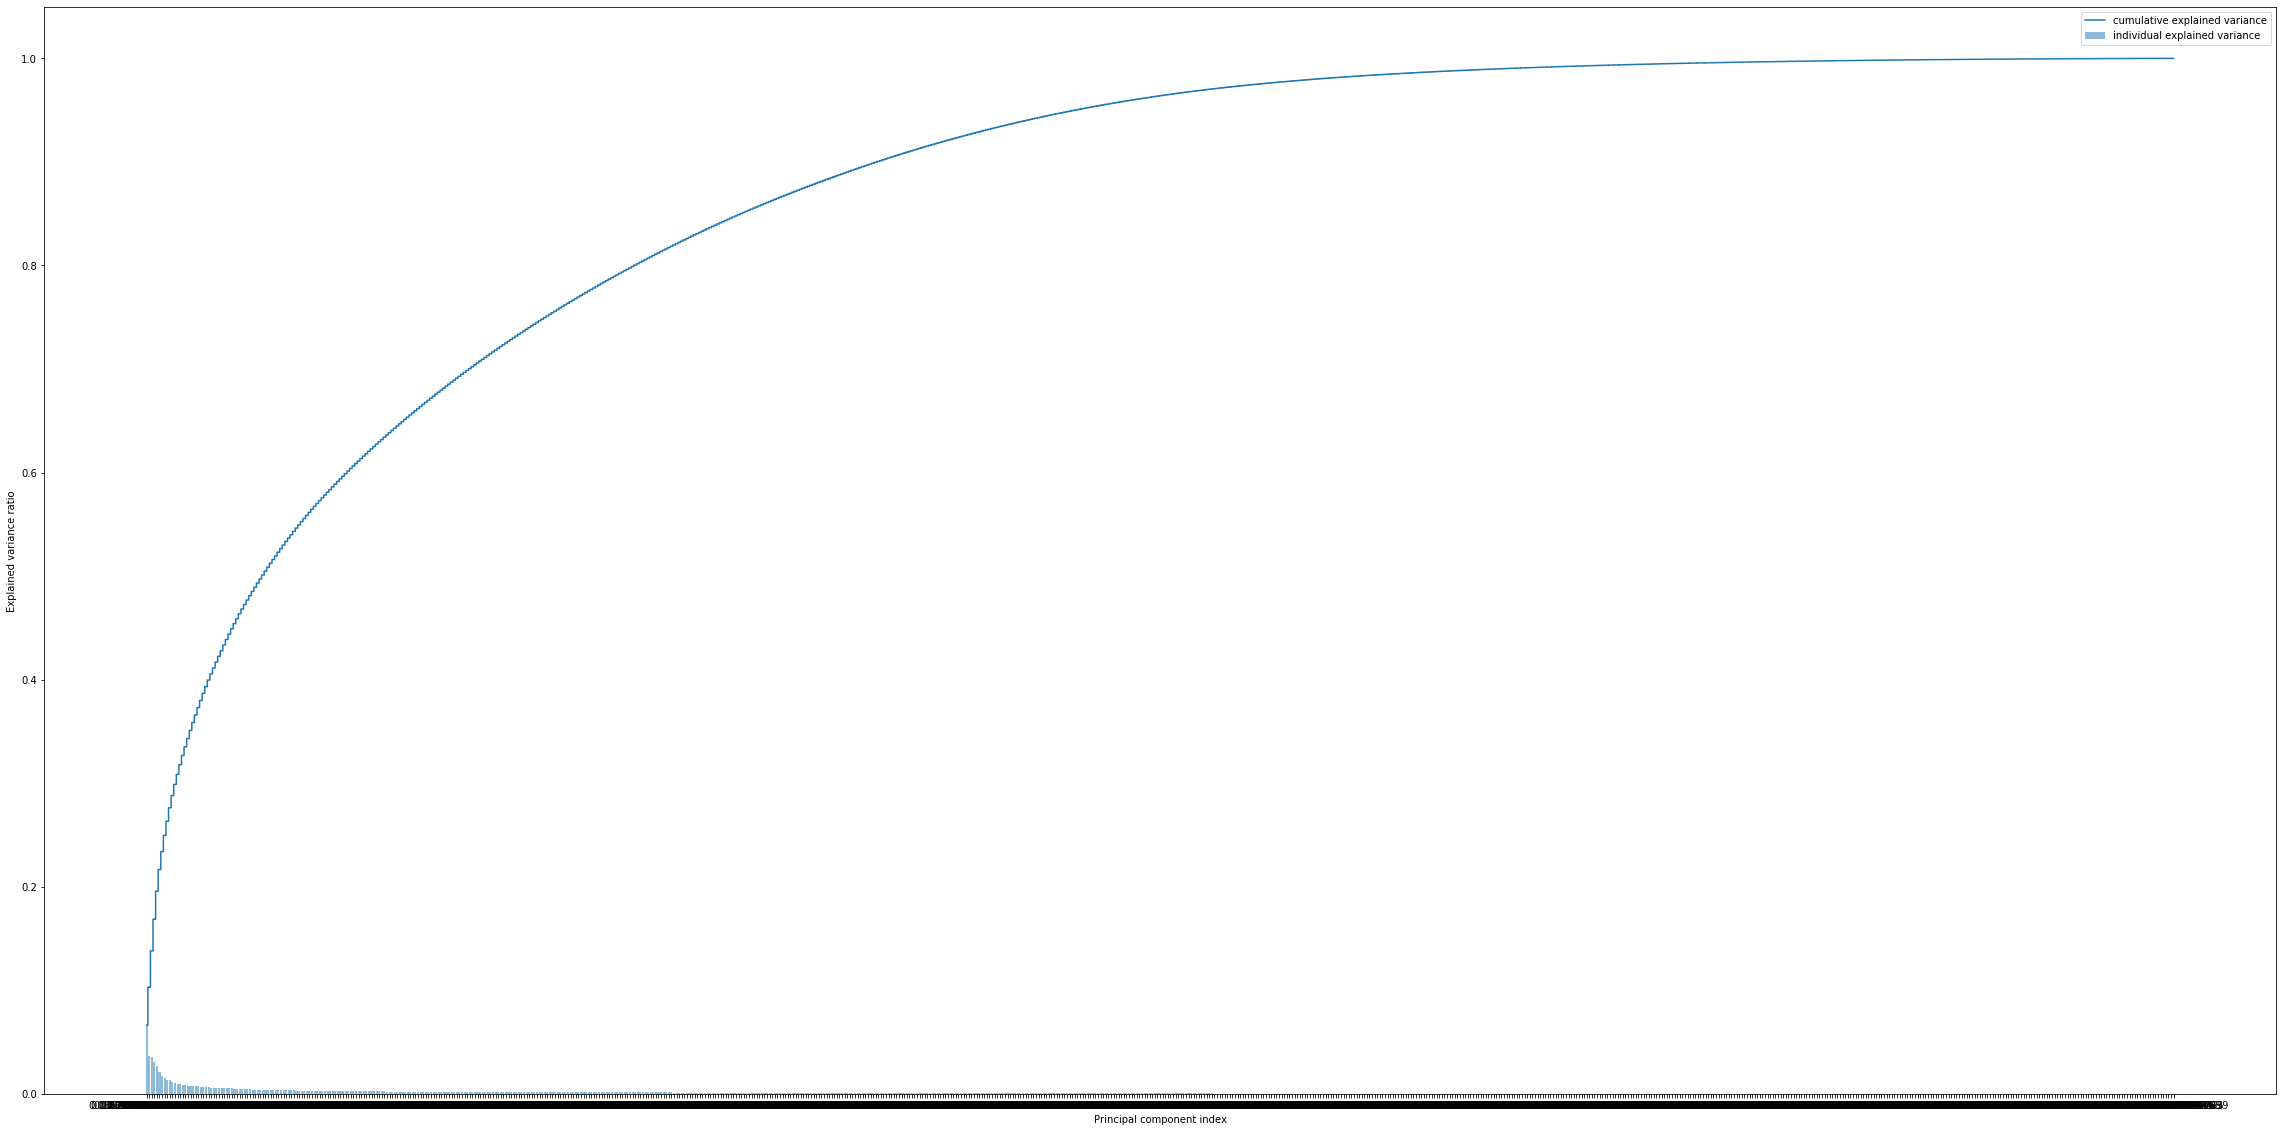

In [14]:
import matplotlib.pyplot as plt

# calculate cumulative sum of explained variances
tot = sum(dataB_eigen_values)
var_exp = [(i/tot) for i in sorted(dataB_eigen_values, reverse=True)]
y_pos=np.arange(len(var_exp))
#y_pos=range (1,784)
#len(var_exp)
#print(var_exp.count)
#print(var_exp)
cum_var_exp = np.cumsum(var_exp)

plt.figure(figsize=(40,20))
# plot explained variances
plt.bar(y_pos,var_exp,align='center', alpha=0.5,label='individual explained variance')
#plt.xticks(y_pos,var_exp)
plt.step(y_pos, cum_var_exp,where= 'mid',label='cumulative explained variance')
plt.xticks(y_pos,cum_var_exp)
plt.ylabel('Explained variance ratio')

plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.show()

### It can be seen from above that the cummulative variance of first few principal components explain almost 60 % of variance in the dataset

<BarContainer object of 785 artists>

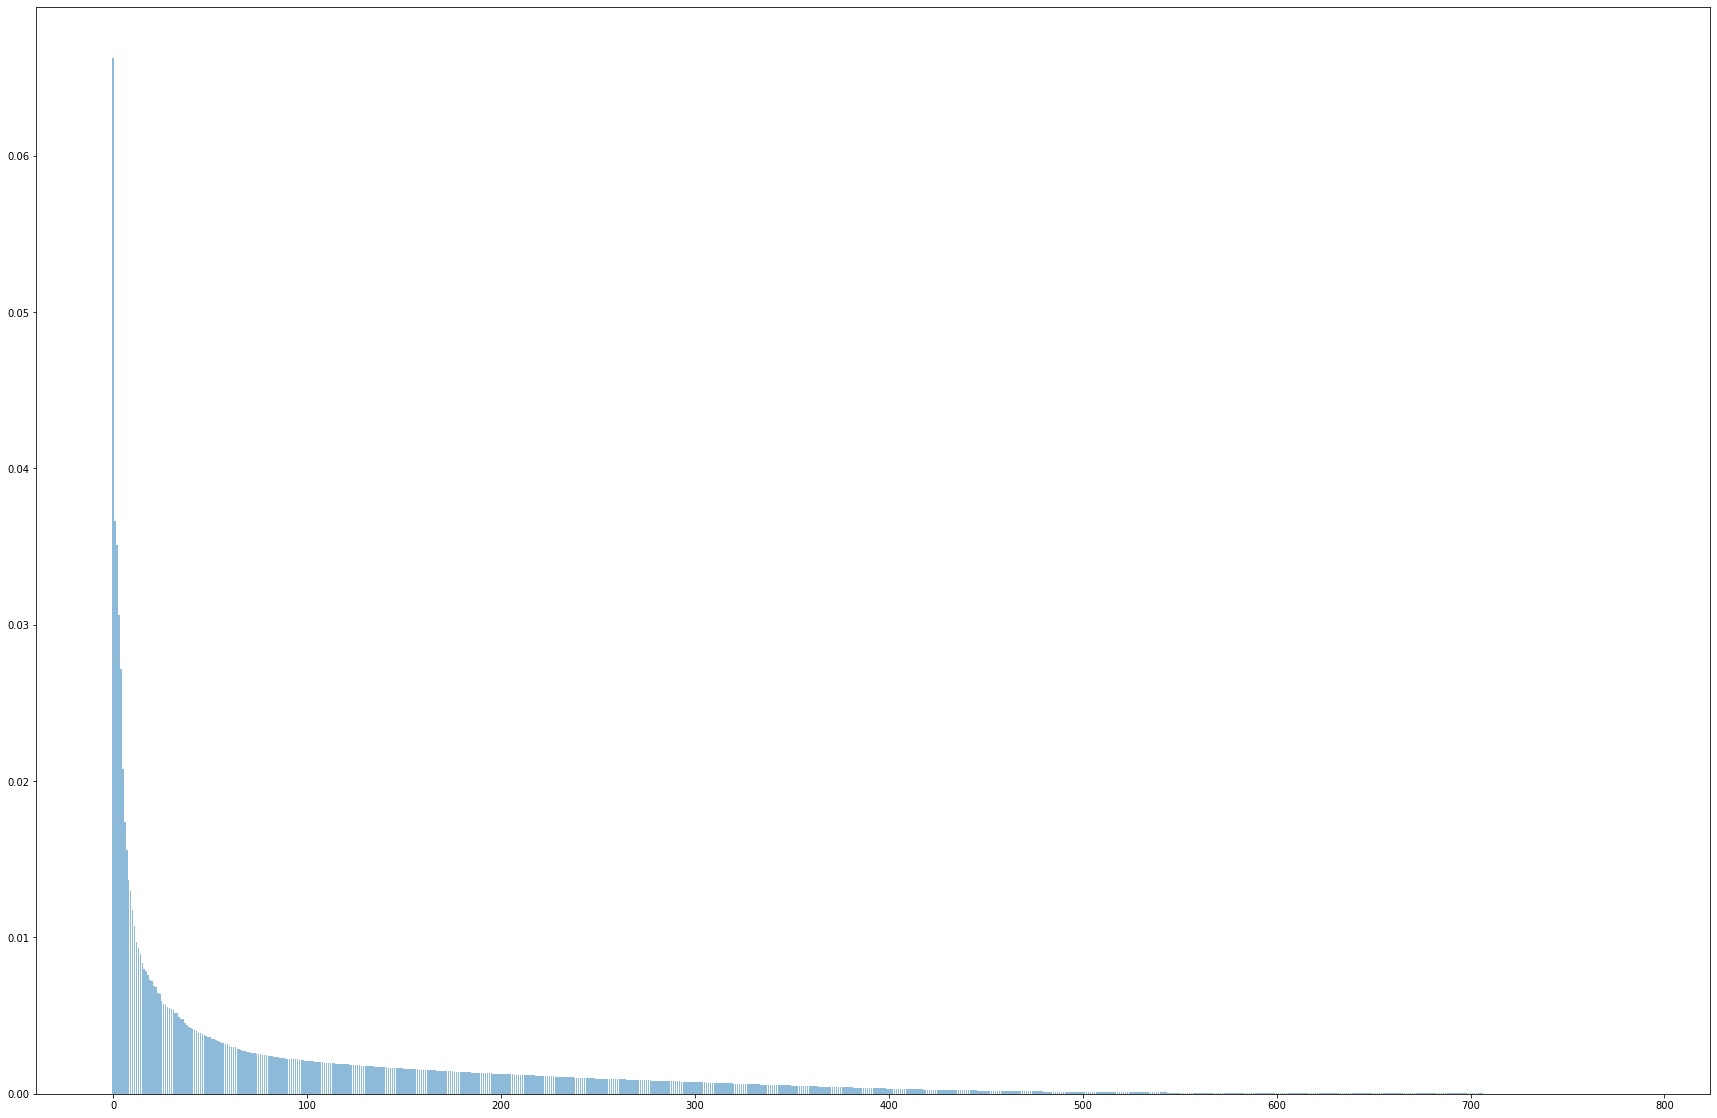

In [15]:
plt.figure(figsize=(30,20))
plt.bar(y_pos,var_exp,align='center', alpha=0.5,label='individual explained variance')

### It can be seen that 1st 25 principal components (approximately) are most accountable 

##### Step 4 Feature Extraction 

In [16]:
#Sorted Eigen Pairs by decreasing order of the Eigen Values

# Make a list of (eigenvalue, eigenvector) tuples
eigen_pairs = [(np.abs(dataB_eigen_values[i]), dataB_eigen_vectors[:, i]) for i in range(len(dataB_eigen_values))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eigen_pairs.sort(key=lambda k: k[0], reverse=True)

In [21]:
#Considering 1st two PCA Components

w = np.hstack((eigen_pairs[0][1][:, np.newaxis], eigen_pairs[1][1][:, np.newaxis], eigen_pairs[2][1][:, np.newaxis] ,eigen_pairs[3][1][:, np.newaxis], eigen_pairs[4][1][:, np.newaxis] ,eigen_pairs[5][1][:, np.newaxis] ))
print('Matrix W:\n', w)

rows=len(w)
columns=len(w[0])
print(rows)
print(columns)



Matrix W:
 [[-0.00527766  0.00109112 -0.00162038  0.01303178  0.00740709 -0.0030389 ]
 [-0.00017864 -0.00586636 -0.00288548  0.00610434 -0.00543435 -0.00031781]
 [-0.00067033  0.00191026  0.00369498 -0.00210752 -0.00608522  0.00314961]
 ...
 [ 0.00053964  0.01013802 -0.00664226 -0.00363434 -0.0035935   0.00170794]
 [-0.0114084   0.00505945 -0.00898704  0.00273568  0.00150111 -0.00637981]
 [ 0.02440569 -0.06406364 -0.08509499  0.07505388  0.05681482 -0.0292049 ]]
785
6


[[ 0.34185752 -0.33905244 -0.96230646 ...  1.03440486 -0.33543241
   0.67964891]
 [-0.33252989  0.33071508  0.3776022  ...  1.03440486  0.98618956
   1.39491262]
 [-0.33252989 -1.00881996 -0.29235213 ... -0.9423565   0.32537858
  -0.03561479]
 ...
 [ 1.01624493  0.33071508 -0.29235213 ... -0.28343605 -0.99624339
  -0.75087849]
 [-1.0069173  -0.33905244 -0.96230646 ...  0.37548441 -1.65705438
  -0.03561479]
 [ 1.69063234 -1.00881996  1.04755652 ... -0.9423565   0.32537858
   1.39491262]]
1446
785
[ 7.82111255  0.05920414  0.87798954 -2.10556227  1.41981269 -0.97863902]
[[  7.82111255   0.05920414   0.87798954  -2.10556227   1.41981269
   -0.97863902]
 [  0.44332697  -8.64706805 -11.50382318   2.04912451   5.33776547
   -0.14697681]
 [ -1.32073908   8.54560402  -3.22775028   4.51360923  -3.9819731
    0.2071489 ]
 ...
 [  8.23832065   2.20869371  -0.93897248  -6.06134131  -0.76594151
    1.24320361]
 [  7.43067232   1.52683747   2.62946675  -1.16291974  -2.88406977
    1.86114528]
 [ -7.

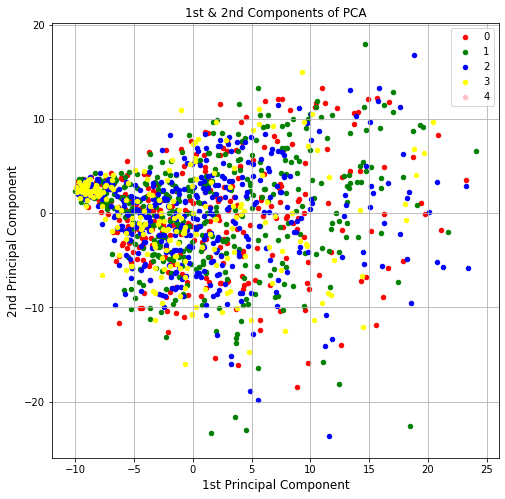

In [25]:
print(X_train_std)
print(len(X_train_std))
print(len(X_train_std[0]))

X_train_std[0].dot(w)
print(X_train_std[0].dot(w))
X_train_pca = X_train_std.dot(w)

print(X_train_pca)

print("First PCA Component")
print(X_train_pca[y_train==1,0])
print("Second PCA Component")
print(X_train_pca[y_train==1,1])


dataB_df_PCA = pd.DataFrame(X_train_pca, columns = ['Component 1', 'Component 2', 'Component 3', 'Component 4', 'Component 5', 'Component 6'])
dataB_finalDf = pd.concat([dataB_df_PCA, dataB_updated[['gnd']]], axis = 1)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('1st Principal Component', fontsize = 12)
ax.set_ylabel('2nd Principal Component', fontsize = 12)
ax.set_title('1st & 2nd Components of PCA')
targets = [0 , 1 , 2 , 3 , 4]
colors = ['red', 'green', 'blue', 'yellow', 'pink']
for target, color in zip(targets,colors):
    indicesToKeep = dataB_finalDf['gnd'] == target
    ax.scatter(-dataB_finalDf.loc[indicesToKeep, 'Component 1']
                 , dataB_finalDf.loc[indicesToKeep, 'Component 2']
                 , c = color
                 , s = 20)
ax.legend(targets)
ax.grid()
plt.show()

# 2. Using PCA method of sklearn

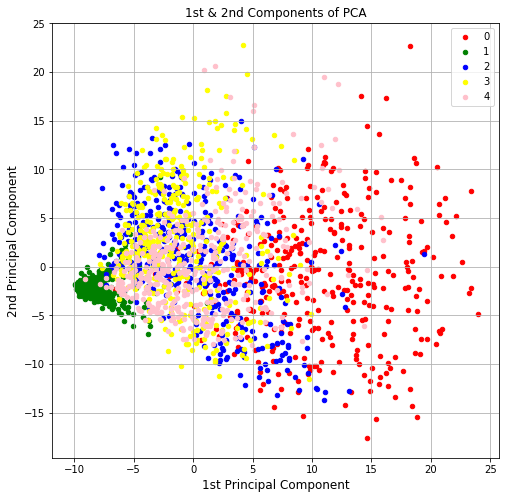

In [24]:
from numpy.linalg import eig
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

df = dataB_updated.iloc[:,1:785]
df_mean = np.mean(df.T, axis=1)
df_norm = df - df_mean;
df_cov = np.cov(df_norm.T)
df_eigval, df_eigvec = eig(df_cov)
#print("Eigenvalues : ")
#print(df_eigval)
#print(" ")
#print("Eigenvectors : ")
#print(df_eigvec)

p = df.astype(float)
scaler = StandardScaler()
p = scaler.fit_transform(p)
pca = PCA(n_components=6)
pca_array = pca.fit_transform(p)
pca_val = pca.explained_variance_


df_PCA = pd.DataFrame(pca_array, columns = ['Component 1', 'Component 2', 'Component 3', 'Component 4', 'Component 5', 'Component 6'])
finalDf = pd.concat([df_PCA, dataB_updated[['gnd']]], axis = 1)
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('1st Principal Component', fontsize = 12)
ax.set_ylabel('2nd Principal Component', fontsize = 12)
ax.set_title('1st & 2nd Components of PCA')
targets = [0 , 1 , 2 , 3 , 4]
colors = ['red', 'green', 'blue', 'yellow', 'pink']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['gnd'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'Component 1']
                 , finalDf.loc[indicesToKeep, 'Component 2']
                 , c = color
                 , s = 20)
ax.legend(targets)
ax.grid()
plt.show()

# 3. Repeated Step 2 for 5th and 6th components

Step 1. Calculated 5th and 6th Components on Scatter Plot

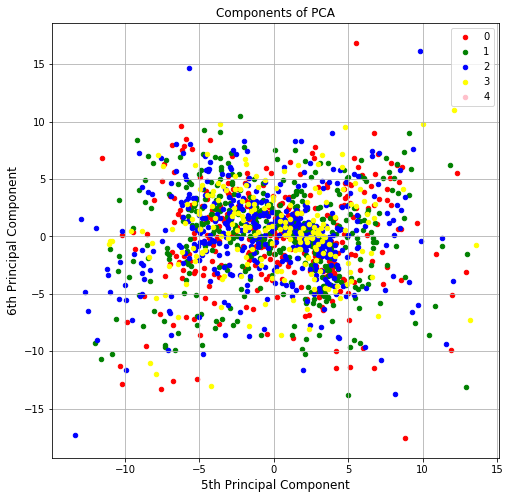

In [28]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('5th Principal Component', fontsize = 12)
ax.set_ylabel('6th Principal Component', fontsize = 12)
ax.set_title('Components of PCA')
targets = [0 , 1 , 2 , 3 , 4]
colors = ['red', 'green', 'blue', 'yellow', 'pink']
for target, color in zip(targets,colors):
    indicesToKeep = dataB_finalDf['gnd'] == target
    ax.scatter(-dataB_finalDf.loc[indicesToKeep, 'Component 5']
                 , dataB_finalDf.loc[indicesToKeep, 'Component 6']
                 , c = color
                 , s = 20)
ax.legend(targets)
ax.grid()
plt.show()

Step 2 Calculated 5th and 6th components on Scatter plot

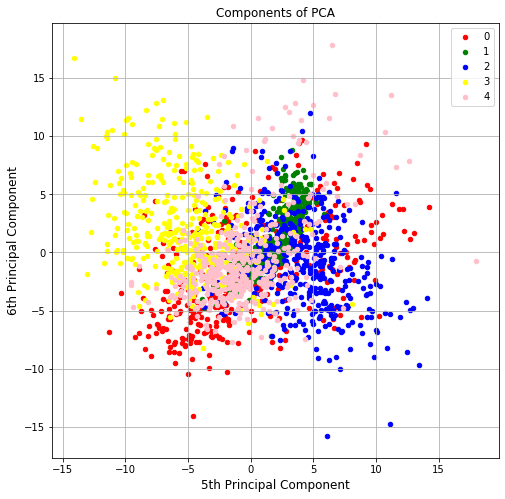

In [29]:
df_PCA = pd.DataFrame(pca_array, columns = ['Component 1', 'Component 2', 'Component 3', 'Component 4', 'Component 5', 'Component 6'])
finalDf = pd.concat([df_PCA, dataB_updated[['gnd']]], axis = 1)
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('5th Principal Component', fontsize = 12)
ax.set_ylabel('6th Principal Component', fontsize = 12)
ax.set_title('Components of PCA')
targets = [0 , 1 , 2 , 3 , 4]
colors = ['red', 'green', 'blue', 'yellow', 'pink']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['gnd'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'Component 5']
                 , finalDf.loc[indicesToKeep, 'Component 6']
                 , c = color
                 , s = 20)
ax.legend(targets)
ax.grid()
plt.show()

## Comments on the Result , From scatter Plot of 1st and 2nd PCA Components it can be seen that the its is easier to classify because of higher correlation
## Whereas, From scatter Plot of 5th and 6th Components it can be seen that its difficult to classify beacuse all of the class markers are dispersed in one area which represents that the correlation is lesser hence making classification harder